fit a power law to BH masses

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [16]:
gwtc1_c=pd.read_csv('/Users/vivien/Downloads/gwtc1_confident.csv')

In [33]:
masses=np.concatenate((gwtc1_c.mass_1_source,gwtc1_c.mass_2_source,gwtc1_c.final_mass_source))

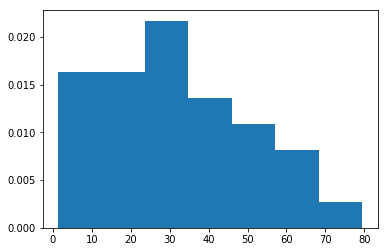

In [64]:
h,x,_=plt.hist(masses,bins='auto',density=True)

In [71]:
x=x[0:-1]+np.diff(x)/2

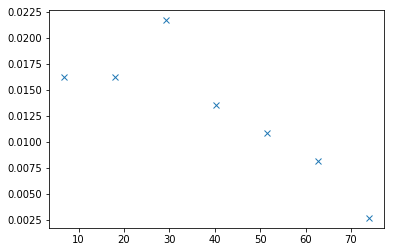

In [73]:
plt.plot(x,h,'x')

In [78]:
def PowerLaw(x, alpha, K):
    '''
    Define a PowerLaw function
    '''
    return K*x**(-alpha)

In [79]:
p_init=np.array([2.5, 0.015]) # guess of initial parameters, based on looking at the plot
popt, pcov = curve_fit(f=PowerLaw, xdata=x, ydata=h, p0=p_init) # fits data

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in power
  """


Best guess parameters  [0.28308429 0.03348431]
Estimate of errors  [0.17907253 0.01917809]


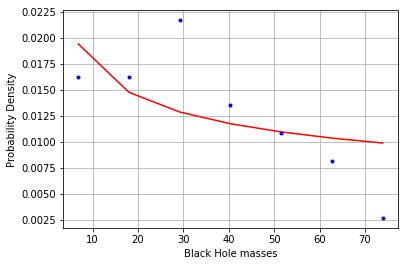

In [81]:
print('Best guess parameters ', popt)
print('Estimate of errors ', np.sqrt(pcov.diagonal()))
plt.plot(x, PowerLaw(x, *popt), 'r', label='Fit');
plt.plot(x, h, 'b.')
plt.xlabel('Black Hole masses')
plt.ylabel('Probability Density')
plt.grid()

In [82]:
p_init=np.array([2.5, 0.015]) # guess of initial parameters, based on looking at the plot
popt, pcov = curve_fit(f=PowerLaw, xdata=x[2:], ydata=h[2:], p0=p_init) # fits data

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in power
  """


Best guess parameters  [1.49982145 3.47188183]
Estimate of errors  [0.23809747 2.97150382]


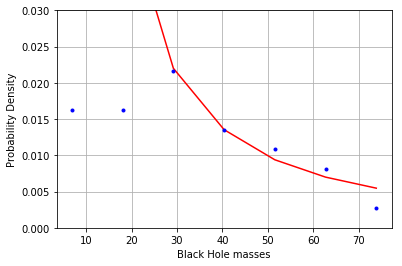

In [85]:
print('Best guess parameters ', popt)
print('Estimate of errors ', np.sqrt(pcov.diagonal()))
plt.plot(x, PowerLaw(x, *popt), 'r', label='Fit');
plt.plot(x, h, 'b.')
plt.xlabel('Black Hole masses')
plt.ylabel('Probability Density')
plt.ylim([0,0.03])
plt.grid()